## Стохастический градиентный спуск


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
#создадим датафрейм со значениями функции
data = pd.DataFrame({'i': range(1, 31),'value': [np.random.uniform(0, 3) * 3 + i + 5 for i in range(1, 31)]})
data

,i,value
0,1,10.048331
1,2,9.799457
2,3,15.646812
3,4,15.851245
4,5,15.149665
5,6,14.623827
6,7,13.053990
7,8,18.023331
8,9,15.408530
9,10,22.569620


In [120]:
Y = data['value']
X = np.column_stack((data['i'].values, np.ones(30)))

In [121]:
def f(a, b):
    return np.sum((Y - np.dot(X, [a, b]))**2)

In [122]:
par = np.linalg.inv(X.T @ X) @ X.T @ Y #МНК

In [123]:
def df(a, b):
    p = np.random.randint(0, len(data))
    grad_a = -2 * X[p, 0] * (Y[p] - np.dot(X[p], [a, b]))
    grad_b = -2 * (Y[p] - np.dot(X[p], [a, b]))
    return np.array([grad_a, grad_b])

In [124]:
w0 = np.array([0, 0])
la = 0.00001
res = [w0]

In [127]:
while True:
    gradient = df(*w0)
    w1 = w0 - la * gradient
    res.append(w1)
    if np.linalg.norm(w1 - w0) < 0.0001:
        break
    w0 = w1

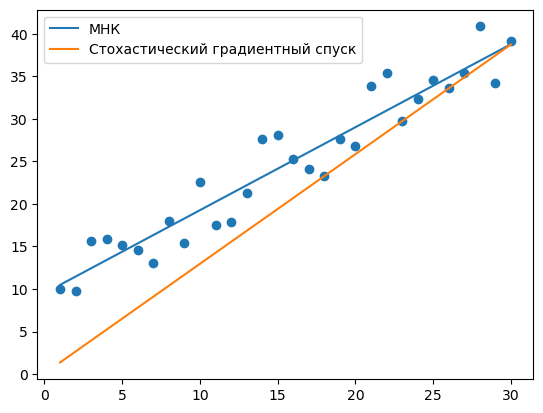

In [128]:
plt.scatter(data['i'], data['value'])
plt.plot(data['i'], par[1] + par[0] * data['i'], label='МНК')
plt.plot(data['i'], w0[1] + w0[0] * data['i'], label='Стохастический градиентный спуск')
plt.legend()
plt.show()